In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

gift_data = pd.read_csv("data/registro-obsequios-funcionarios-publicos-20201009.csv")
gift_data.head()

,expediente,funcionario_nombre_completo,funcionario_apellido_completo,funcionario_cuil,funcionario_jurisdiccion,funcionario_reparticion,funcionario_funcion,obsequio_caracter,obsequio_tipo,obsequio_descripcion,...,obsequiador_tipo,obsequiador_nombre_completo,obsequiador_apellido_completo,obsequiador_descripcion,obsequiador_cuit,obsequiador_razon_social,obsequiador_organismo,obsequiador_nombre_representante,obsequiador_apellido_representante,obsequiador_cargo_representante
0,RL-2017-1920930-APN-OA#MJ,Leonardo Hugo,Limanski,2.032953e+10,Ministerio de Justicia y Derechos Humanos,Oficina Anticorrupción,Asesor de gabinete,Costumbre diplomática,Alimentos,Chocolate Ghirardelli,...,Organismo Internacional,NaN,NaN,NaN,NaN,NaN,Embajada de EEUU - Sección Política,Albert J.,Kraaimoore,Sección política
1,RL-2017-1967319-APN-OA#MJ,Laura,Alonso,2.723121e+10,Ministerio de Justicia y Derechos Humanos,Oficina Anticorrupción,"Secretaria de Ética Pública, Transparencia y L...",Cortesía,Alimentos,Dulce de leche 450 gs 2 unidades,...,Persona Jurídica,NaN,NaN,NaN,3.050177e+10,Manfrey,NaN,Ercole J.,Felippa,Presidente
2,RL-2017-1994454-APN-OA#MJ,Mora,Kantor,2.728694e+10,Ministerio de Justicia y Derechos Humanos,Oficina Anticorrupción,DIRECTORA DE PLANIFICACION DE POLITICAS DE TRA...,Cortesía,Objetos en general,Cuaderno anillado promocional de la empresa d...,...,Persona Jurídica,NaN,NaN,NaN,3.050111e+10,HOLCIM ARGENTINA,NaN,Gustavo,Fedi,Gerente de Asuntos Corporativos
3,RL-2017-2057755-APN-OA#MJ,Christian,Ramos,2.328460e+10,Ministerio de Modernización,Dirección Nacional de Gestión Documental Elect...,Director,Cortesía,Objetos en general,1 taza blanca con logo institucional de la Ins...,...,Organismo Público,NaN,NaN,NaN,NaN,NaN,Inspección General de Justicia,Tomás,Frade,Analista de Sistemas
4,RL-2017-2082409-APN-OA#MJ,Laura,Alonso,2.723121e+10,Ministerio de Justicia y Derechos Humanos,Oficina Anticorrupción,"Secretaria de Ética Pública, Transparencia y L...",Costumbre diplomática,Alimentos,Vino Marani Mukuzami,...,Organismo Internacional,NaN,NaN,NaN,NaN,NaN,Embajada de Georgia,Guela,Sekhniachvili,Embajador


In [2]:
gift_data["funcionario_nombre"] = gift_data["funcionario_nombre_completo"] + " " + gift_data["funcionario_apellido_completo"]

# todo remove floating zero from cuil
gift_data["funcionario_cuil"] = gift_data["funcionario_cuil"].apply(str)



In [3]:
funcionarios = gift_data[["funcionario_cuil", "funcionario_nombre"]]
funcionarios = funcionarios.drop_duplicates("funcionario_cuil")
funcionarios = funcionarios.set_index("funcionario_cuil")

In [4]:
def replace_funcionario(row, ** kwargs):
    func = kwargs["f"]
    return func.loc[row["funcionario_cuil"]].values[0]
    


# obtain an giver name
def obsequiador_name(row):
    name = []
    data = []
    nombre = row["obsequiador_nombre_completo"]
    apellido = row["obsequiador_apellido_completo"]    
    razon_social = row["obsequiador_razon_social"]
    organismo = row["obsequiador_organismo"]
    descripcion = row["obsequiador_descripcion"]
    
    
    # print(type(apellido))
    if type(nombre) == str:
        name.append(nombre)
        
    if type(apellido) == str:
        name.append(apellido)
        
    name = " ".join(name)
    name = name.strip()
    
    if type(razon_social) == str:
        data.append(razon_social)
        
    if type(organismo) == str:
        data.append(organismo)
    
    if type(descripcion) == str:
        data.append(descripcion)
    
    if len(name) > 0:
        data.insert(0, name)
    
    return " | ".join(data)
    
    
gift_data["funcionario_nombre"] = gift_data.apply(replace_funcionario, f=funcionarios, axis=1)
gift_data["obsequiador_nombre"] = gift_data.apply(obsequiador_name, raw=True, axis=1)

 

In [5]:
alonsita = gift_data[gift_data["funcionario_nombre"] == "Laura Alonso"]
alonsita[["funcionario_nombre", "obsequio_descripcion", "obsequiador_nombre"]]

,funcionario_nombre,obsequio_descripcion,obsequiador_nombre
1,Laura Alonso,Dulce de leche 450 gs 2 unidades,Manfrey
4,Laura Alonso,Vino Marani Mukuzami,Embajada de Georgia
5,Laura Alonso,Mantel azul y blanco (Nappe bleue XIX siècle M...,Ministerio de Justicia de Georgia
6,Laura Alonso,Caja de golosinas,ARCOR SA
7,Laura Alonso,Dos entradas al Concierto de Elena Rogers en c...,Banco Nación de la República Argentina
8,Laura Alonso,Caja de Té-Libro de Cocina de Azerbaiyán-Revis...,Embajada de Azerbaiyán
9,Laura Alonso,Transparencia y Prevención para el Desarrollo ...,Vicente Monteverde
10,Laura Alonso,Las Personas Primero Chief Emotions Officers.,Eduardo Braun
11,Laura Alonso,"Libro titulado: ""Hacia una Argentina Sustentab...",Laboratorios Bagó
12,Laura Alonso,CONSTITUCIÓN DE LA NACIÓN ARGENTINA.,Procuración del Tesoro de la Nación


In [6]:
mauricio = gift_data[gift_data["funcionario_nombre"] == "Mauricio Macri"]
mauricio[["funcionario_nombre", "obsequio_descripcion", "obsequiador_nombre"]]

,funcionario_nombre,obsequio_descripcion,obsequiador_nombre
15,Mauricio Macri,"Un (1) libro: ""El cambio empieza en el aula""",Fundación Enseña por Argentina
16,Mauricio Macri,Una (1) máscara de yaguareté en madera,David Bustamante
17,Mauricio Macri,"Una (1) chomba con el logo de la ""Asociación T...",Ciudadano
32,Mauricio Macri,Una (1) fotografía de SS.MM. los Reyes de Espa...,SS.MM. Los Reyes de España Felipe y Letizia de...
34,Mauricio Macri,"Dos (2) reproducciones infantiles de ""la galli...",SS.MM. Los Reyes de España Felipe y Letizia de...
...,...,...,...
3607,Mauricio Macri,Un (1) Retrato pintado del Sr. Presidente de ...,Pastores Evangélicos
3611,Mauricio Macri,"Un (1) libro: ""Entre cuentos y narraciones"" /U...",Stella Maris Linardi
3615,Mauricio Macri,"Un (1) libro: ""De qué d10s me hablan…?""","José ""Rafa"" Rodriguez"
3715,Mauricio Macri,(1)Una manta artesanal/ (1) Olla comunitaria R...,Sergio Ziliotto


In [7]:
#print("Gifts gived to MM 🐈")
#for index, row in mauricio.iterrows():
#    print(row["obsequio_descripcion"] + " given by: " + row["obsequiador_nombre"])

In [8]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# define filter
def filter_fun(funcionario):
    result = gifts.query("funcionario_nombre.str.contains(@funcionario)", engine="python")
    print(result.shape[0], " regalos encontrados")
    return result

# define selector
def show_selected(x):
    return gifts[gifts["funcionario_nombre"] == x]
d_select =  widgets.Select(options=funcionarios["funcionario_nombre"])

gifts = gift_data[["funcionario_nombre", "obsequio_descripcion", "obsequiador_nombre"]]

# maybe use with "with" and pd.option_context
pd.set_option("display.max_rows", None, "display.max_columns", None, "display.max_colwidth", 0)

In [9]:
_ = interact(filter_fun, funcionario="Mauricio Macri");


interactive(children=(Text(value='Mauricio Macri', description='funcionario'), Output()), _dom_classes=('widge…

In [10]:
_ = interact(show_selected, x=d_select)

interactive(children=(Select(description='x', options=('Leonardo Hugo Limanski', 'Laura Alonso', 'Mora Kantor'…

In [11]:
gifts = gifts.sort_values("funcionario_nombre")

#gifts_by_funcionario = gifts.set_index("funcionario_nombre")


In [12]:
import matplotlib.pyplot as plt


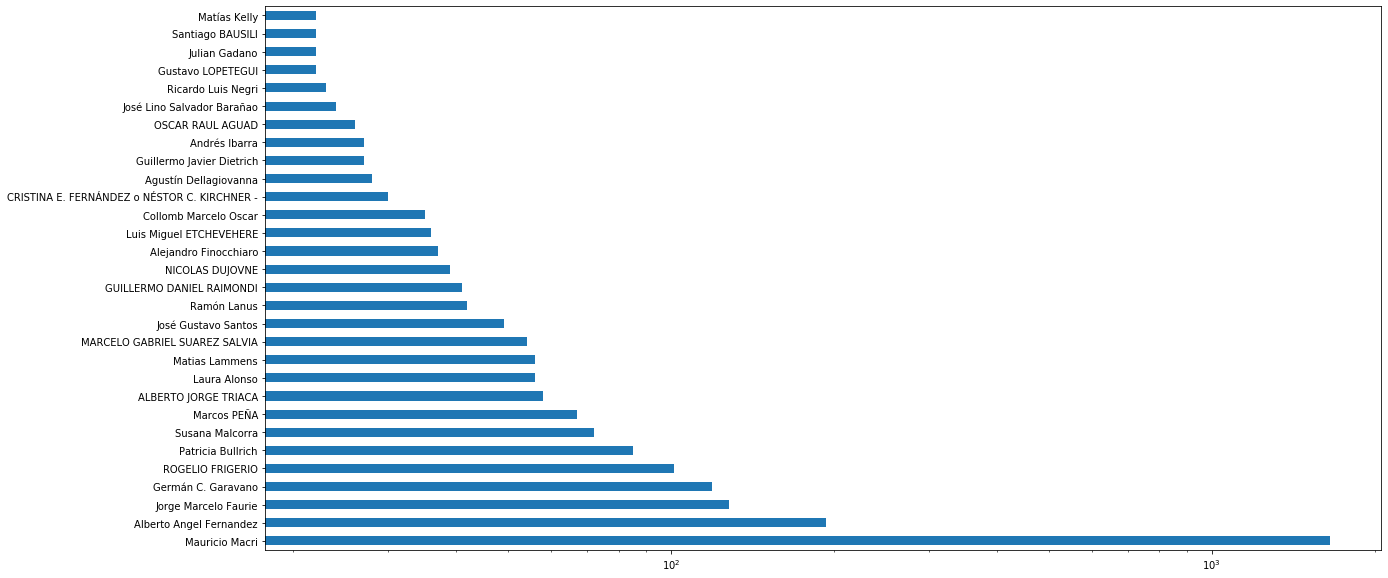

In [13]:
# mas regalados / escala logarítmica - MM se las pasa de regalos
gifts['funcionario_nombre'].value_counts().head(30).plot(kind='barh', figsize=(20,10), logx=True)

In [14]:
obs_count = gifts['obsequiador_nombre'].value_counts()
fun_count = gifts['funcionario_nombre'].value_counts()

In [25]:
gifts_edges = gifts.drop(columns=["obsequio_descripcion"])

In [26]:
gifts_edges

,funcionario_nombre,obsequiador_nombre
3246,ADOLFO RUBINSTEIN,MINISTERIO DE SALUD DE LA PCIA DE CORRIENTES
3245,ADOLFO RUBINSTEIN,MINISTERIO DE SALUD DE LA PROVINCIA DE SAN JUAN
3243,ADOLFO RUBINSTEIN,EMBAJADA DE ITALIA EN ARGENTINS
3236,ADOLFO RUBINSTEIN,Ministerio de Salud de la Provincia de Corrientes
3234,ADOLFO RUBINSTEIN,Cruz Roja Argentina
1223,AGUSTINA PERETTI,Laura LEIBIKER
308,AILIN ESTEFANIA ACCINTI MARTINEZ,KTNet - Don LEE - Gerente de Departamento
573,ALBERTO JORGE TRIACA,ESTUDIO RIGHI Y ASOCIADOS
572,ALBERTO JORGE TRIACA,ENRIQUE PONCE
571,ALBERTO JORGE TRIACA,CORPORACION AMERICA SA


(-0.9617841020226479,
 1.0267694368958473,
 -0.8177426239848137,
 1.1727266094088555)

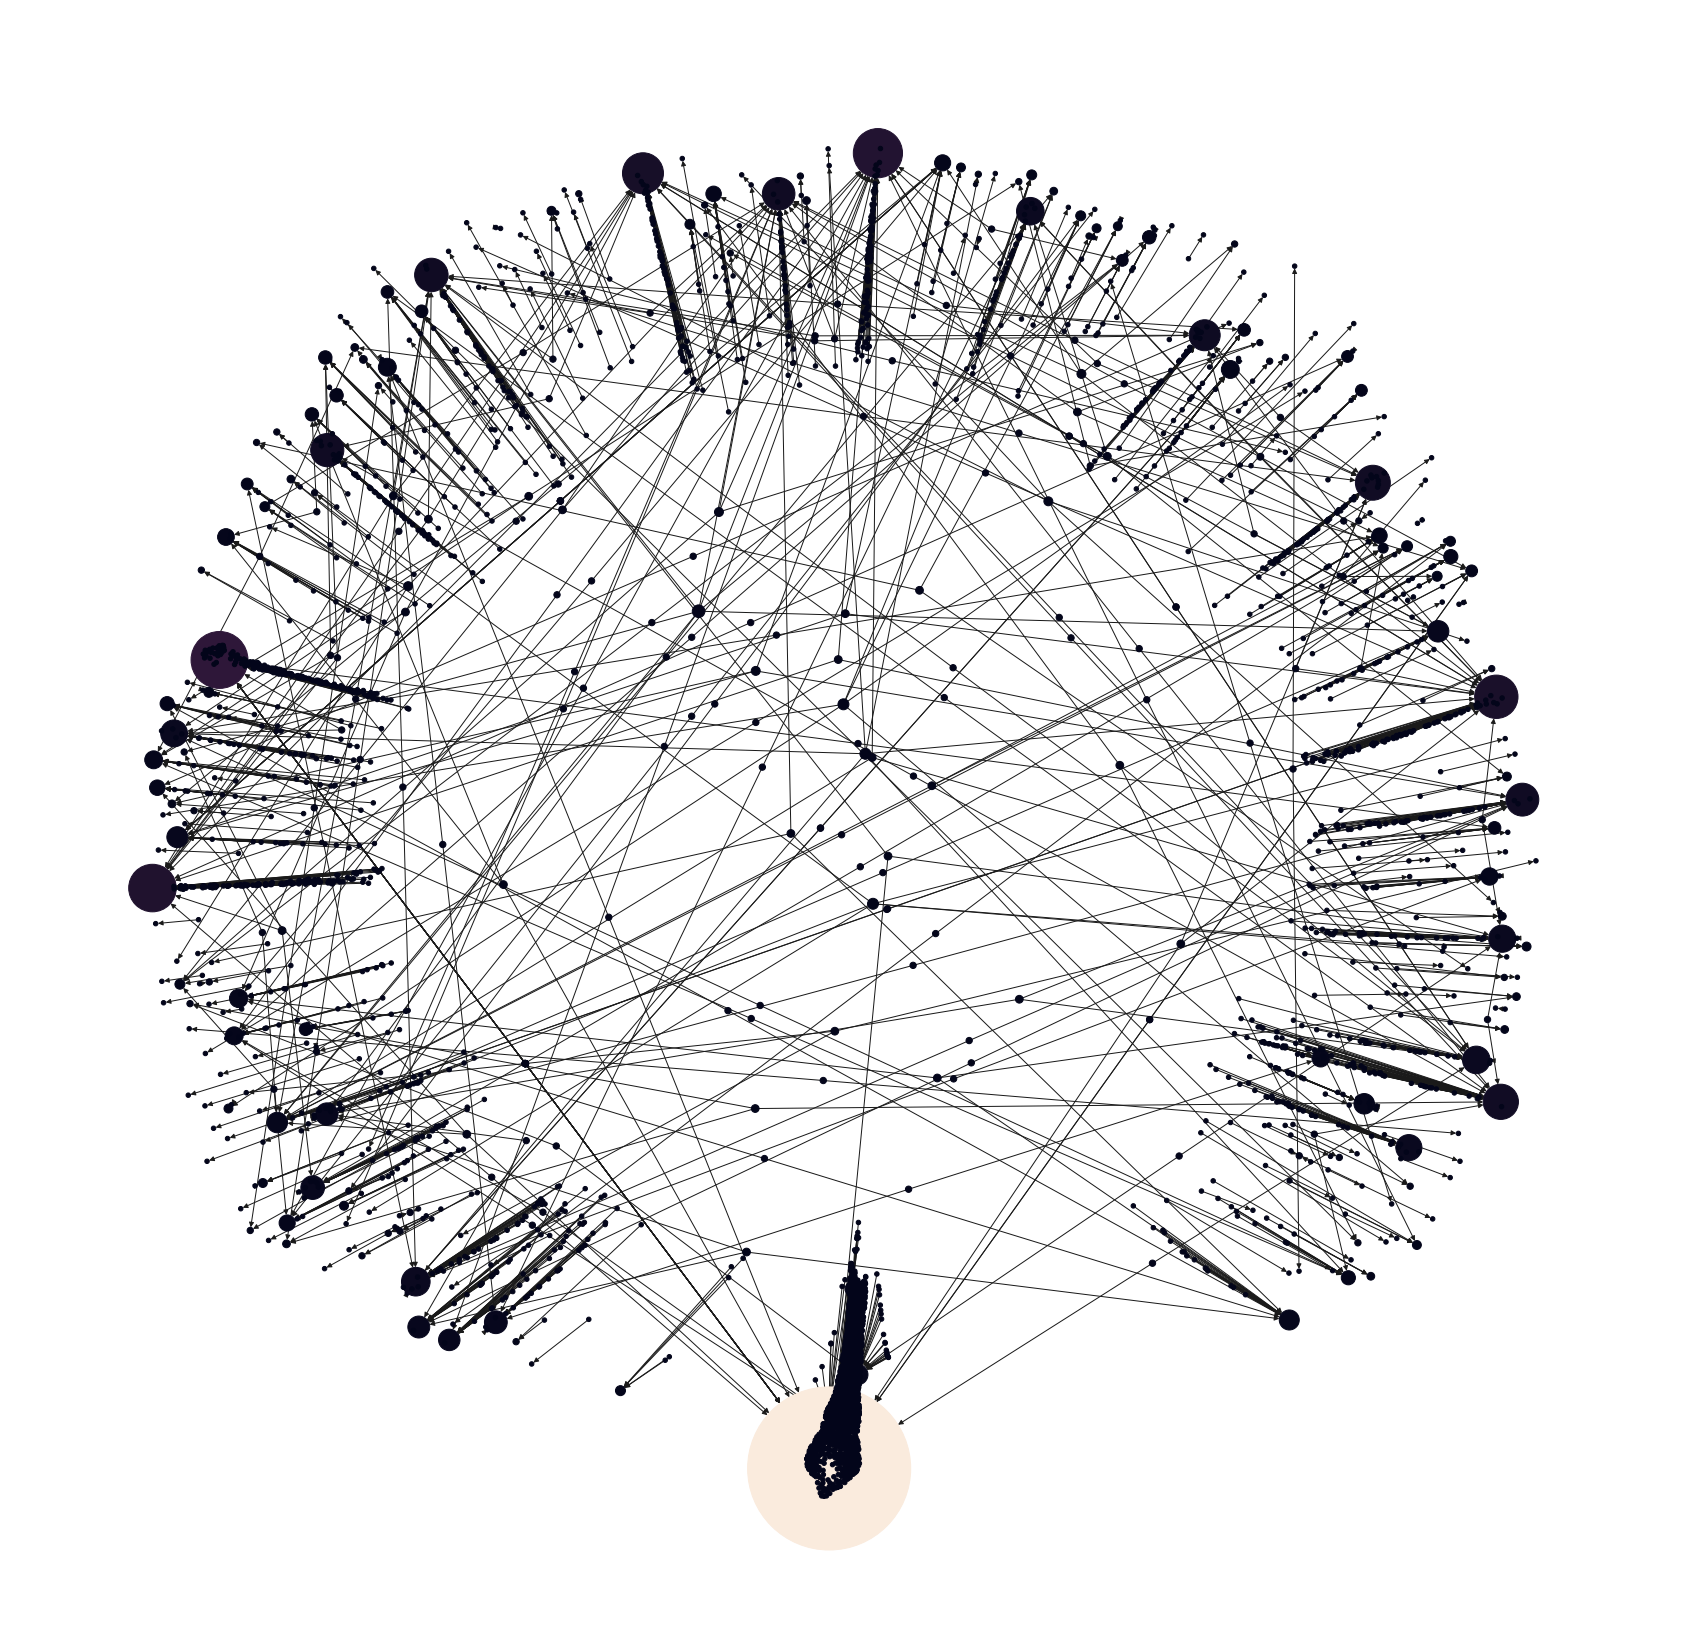

In [135]:
plt.figure(figsize=(30, 30))
G = nx.from_pandas_edgelist(gifts_edges, source="obsequiador_nombre",
                            target="funcionario_nombre",
                            #edge_attr=True,
                            create_using=nx.DiGraph()
                           )

node_color = [float(G.degree(v)) for v in G]
node_size = [float(G.degree(v))*20 for v in G]
nx.draw_networkx(G,  font_size=10, 
                 edge_cmap="summer",
                 node_color=node_color,
                 node_size=node_size,
                 with_labels=False,
                 arrow_size=15
                )
plt.axis("off") 